# 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

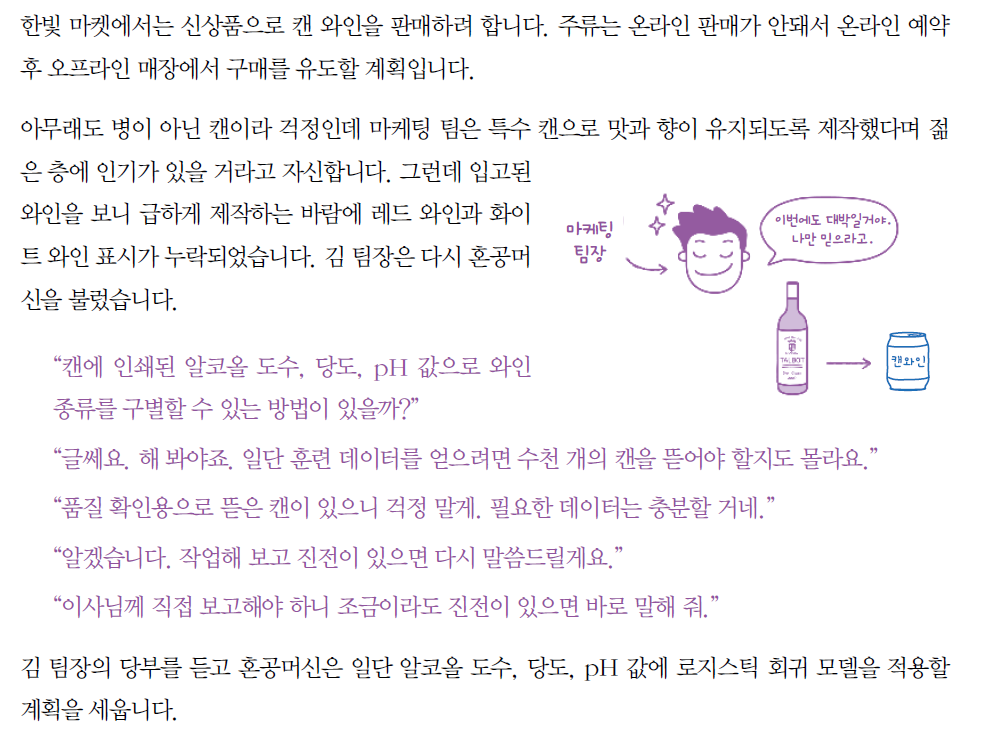

In [90]:
import pandas as pd

In [91]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [92]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [93]:
wine.tail()

alcohol  sugar    pH  class
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

In [94]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [95]:
wine.describe()

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [96]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [97]:
target = wine['class'].to_numpy()
target

array([0., 0., 0., ..., 1., 1., 1.])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [100]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [103]:
train_scaled = ss.transform(train_input)
train_scaled

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       ...,
       [-0.82568214,  0.0267578 ,  0.14437512],
       [-0.82568214,  0.52716215, -0.23153545],
       [-0.82568214, -0.57789745,  1.83597265]])

In [104]:
pd.DataFrame(train_scaled).describe()

0             1             2
count  5.197000e+03  5.197000e+03  5.197000e+03
mean  -2.030450e-14 -8.173395e-16  8.201636e-15
std    1.000096e+00  1.000096e+00  1.000096e+00
min   -2.084854e+00 -1.015751e+00 -2.988213e+00
25%   -8.256821e-01 -7.655491e-01 -6.700978e-01
50%   -1.541238e-01 -5.153469e-01 -4.358016e-02
75%    6.853240e-01  5.688625e-01  6.455892e-01
max    3.119723e+00  1.257857e+01  4.968561e+00

In [105]:
test_scaled = ss.transform(test_input)

In [106]:
pd.DataFrame(test_scaled).describe()

0            1            2
count  1300.000000  1300.000000  1300.000000
mean      0.034399    -0.029626     0.048373
std       1.005612     0.959016     1.035379
min      -1.749075    -0.994901    -3.113516
25%      -0.825682    -0.765549    -0.670098
50%      -0.070179    -0.536197    -0.043580
75%       0.769269     0.485462     0.708241
max       3.707336     4.290620     4.968561

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [109]:
print(lr.score(train_scaled, train_target))

0.7808350971714451


In [110]:
print(lr.score(test_scaled, test_target))

0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [111]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


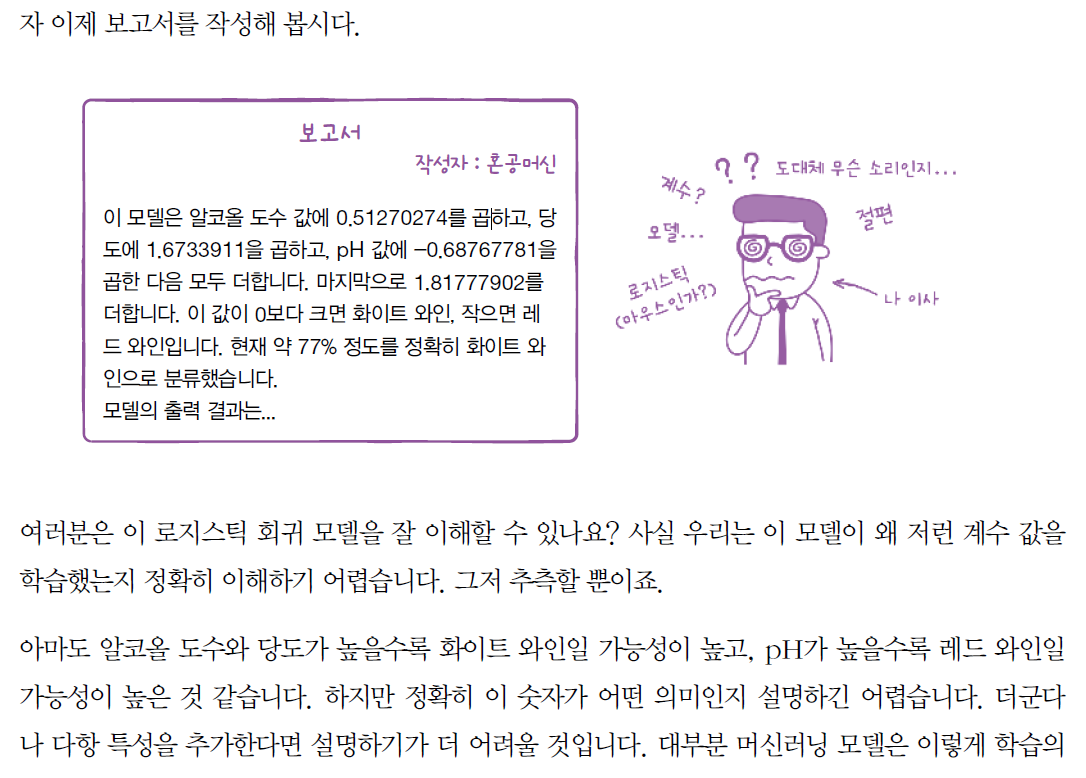
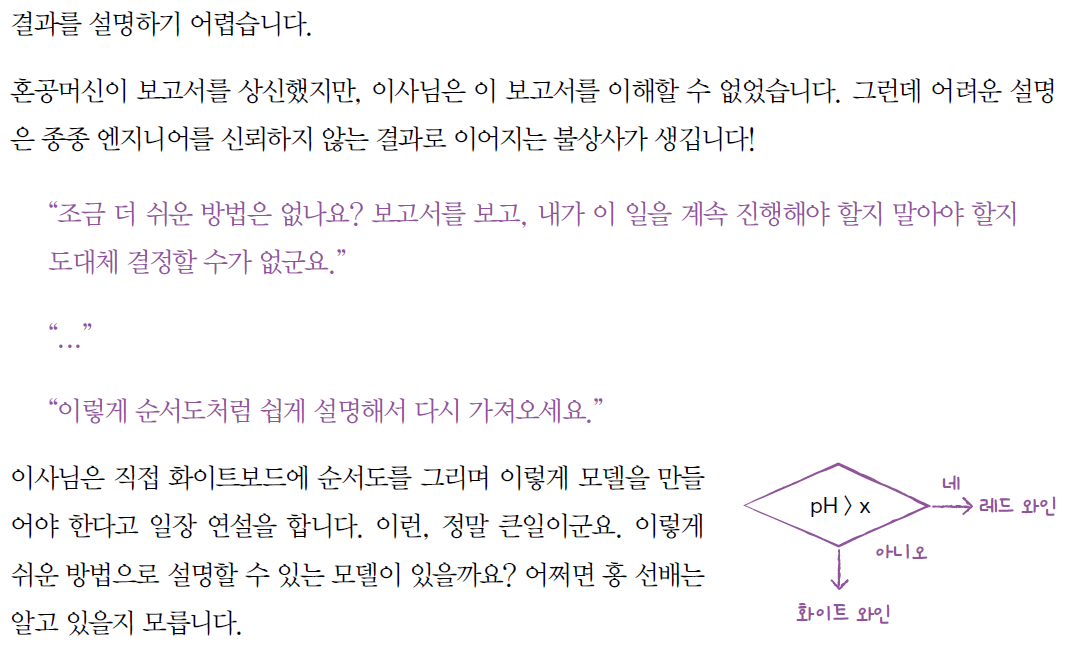

## 결정 트리

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [114]:
print(dt.score(train_scaled, train_target))

0.996921300750433


In [115]:
print(dt.score(test_scaled, test_target))

0.8592307692307692


In [116]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

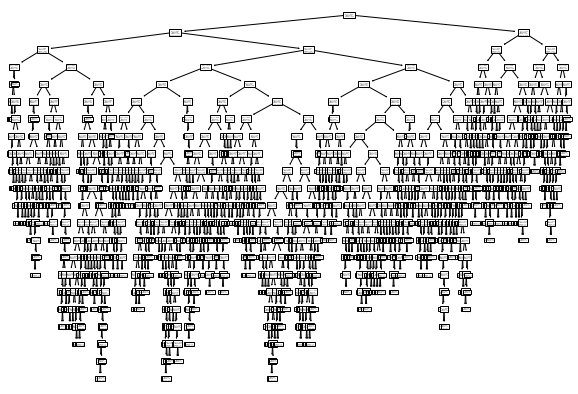

In [117]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

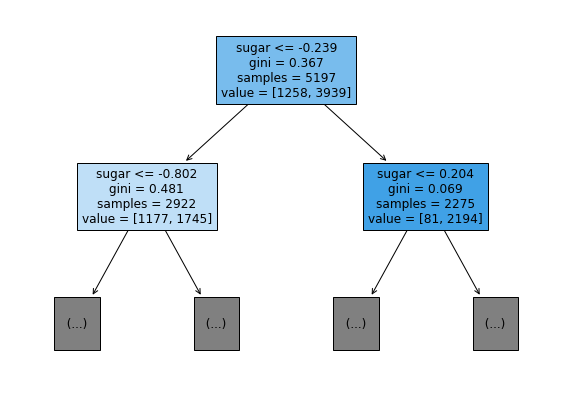

In [118]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

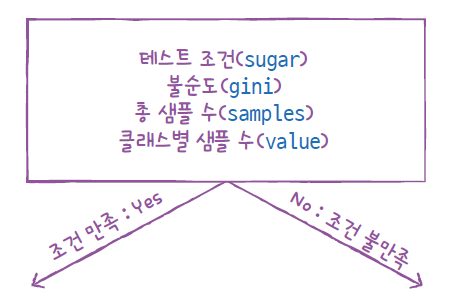

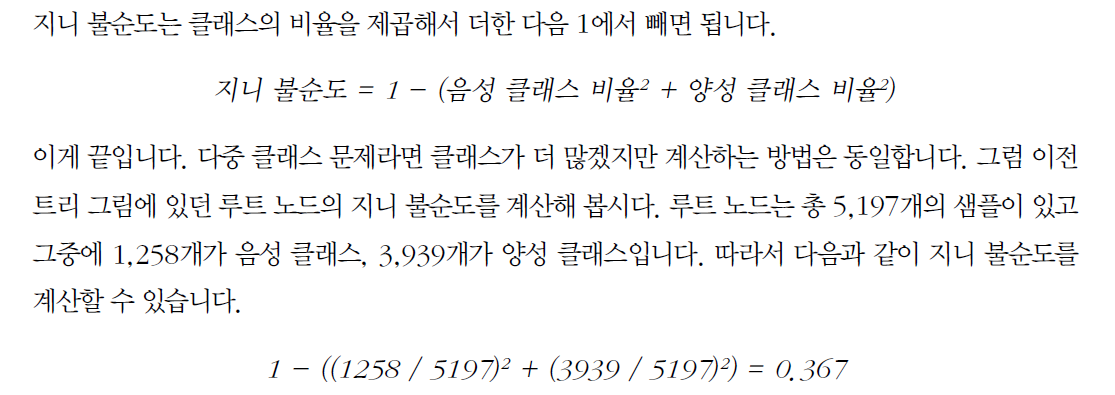
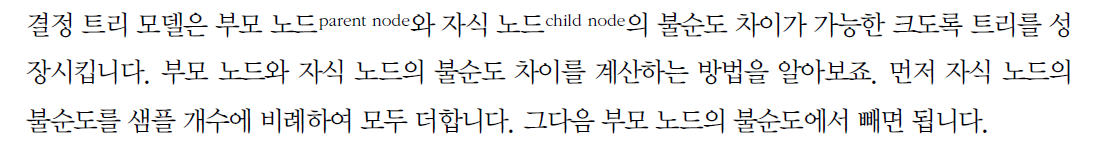
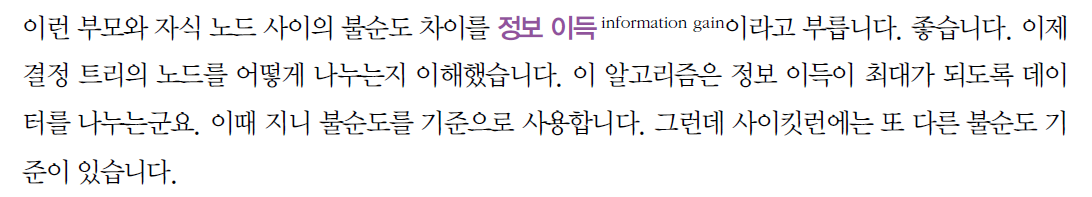

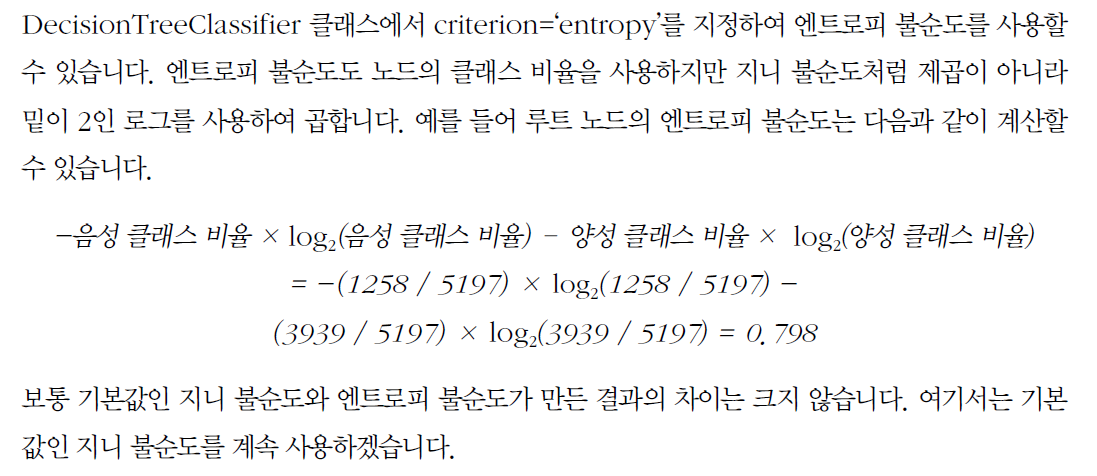

### 가지치기

In [137]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [138]:
print(dt.score(train_scaled, train_target))

0.8454877814123533


In [139]:
print(dt.score(test_scaled, test_target))

0.8415384615384616


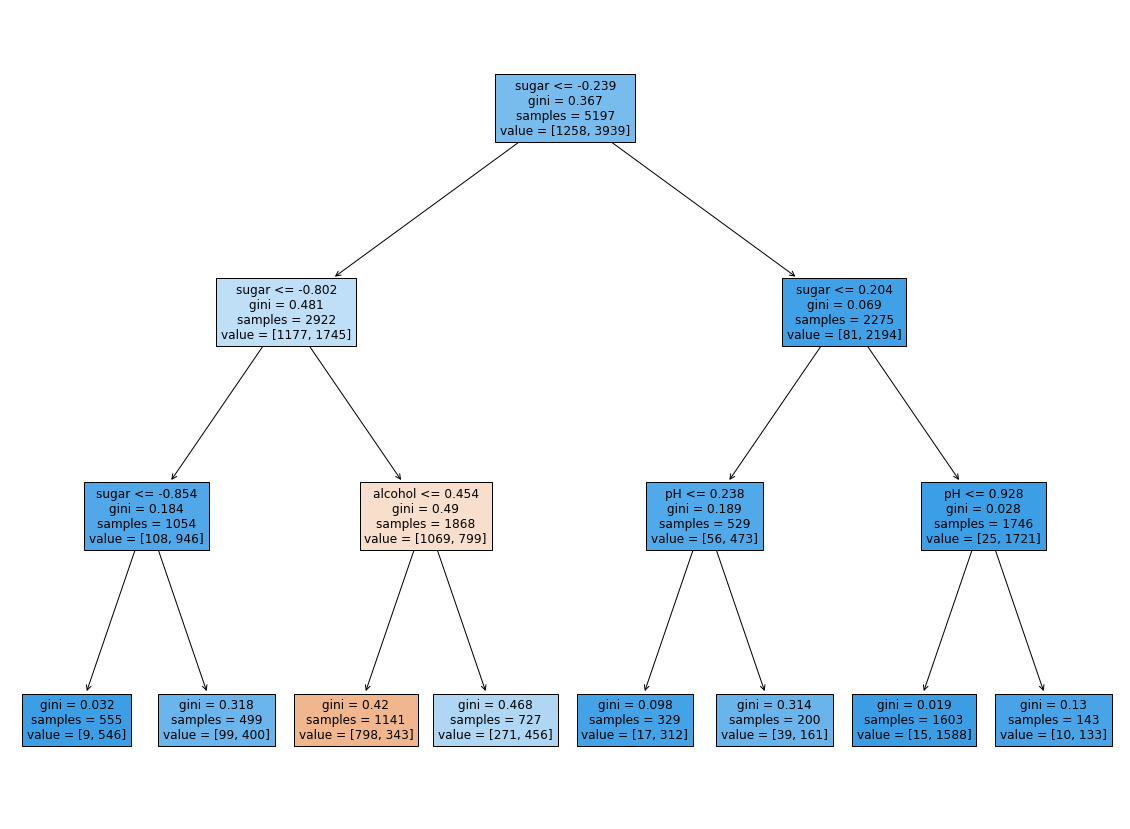

In [140]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [141]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [142]:
print(dt.score(train_input, train_target))

0.8572253223013276


In [143]:
print(dt.score(test_input, test_target))

0.8484615384615385


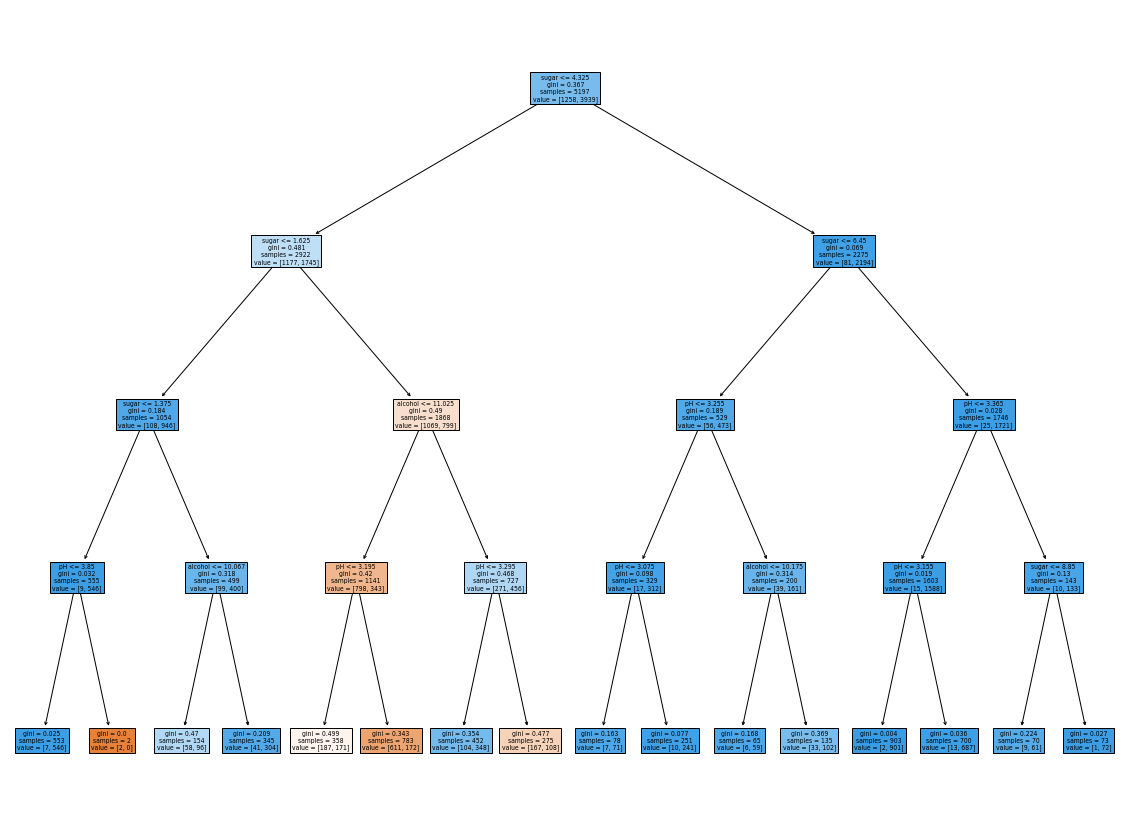

In [144]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [145]:
print(dt.feature_importances_)

[0.12745696 0.76704375 0.10549929]


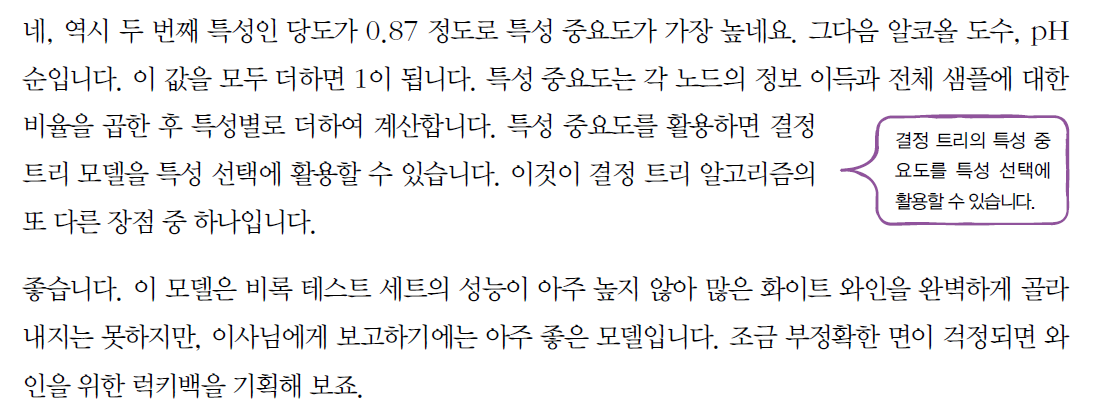

## 확인문제

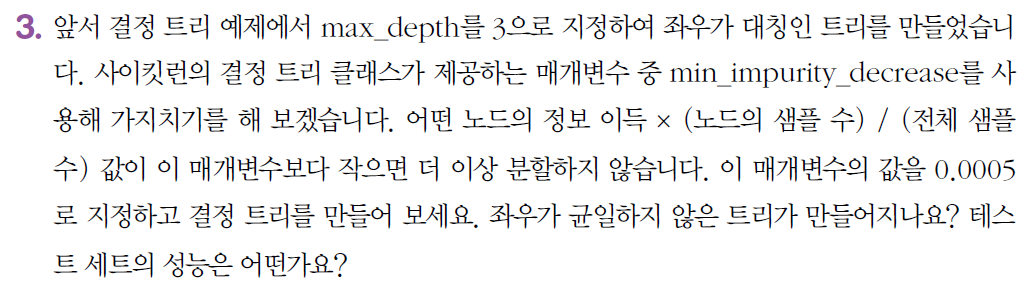

In [158]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0003, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(min_impurity_decrease=0.0003, random_state=42)

In [159]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9005195304983644
0.8623076923076923


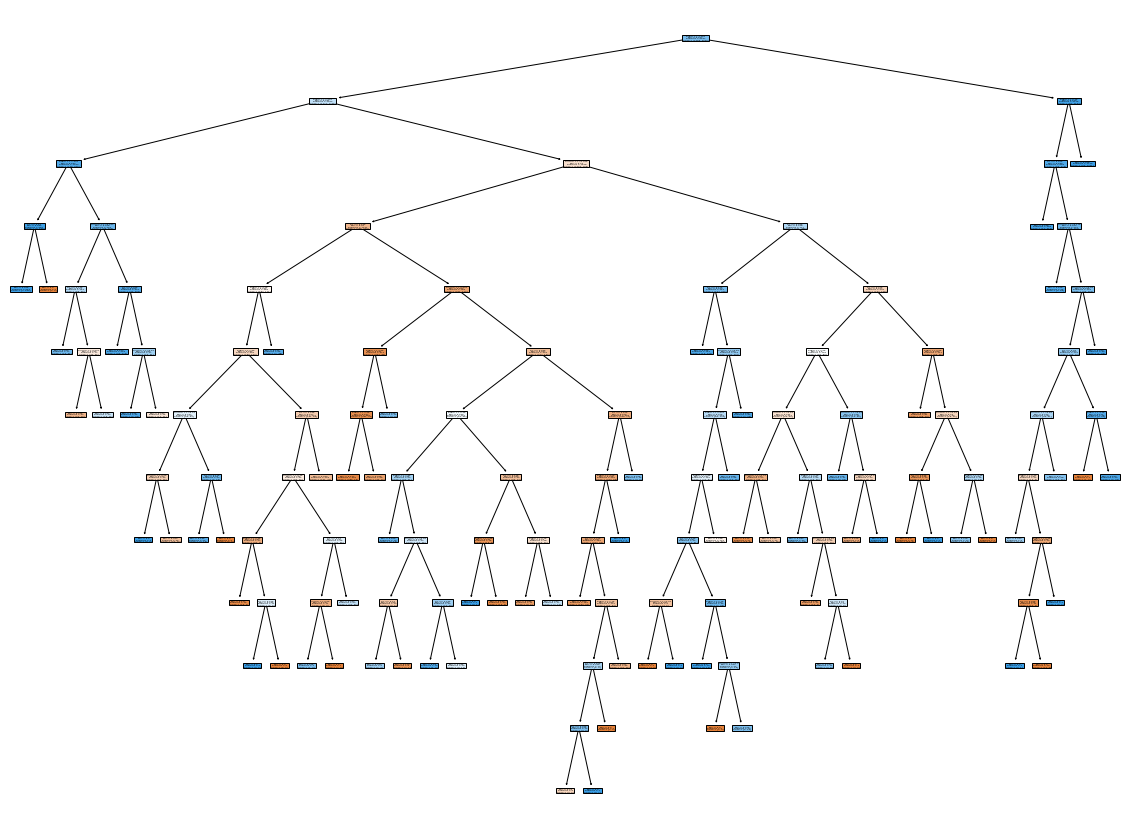

In [160]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()